In [1]:
#new_map = np.expand_dims(global_map, axis=0)
#new_map = np.swapaxes(new_map,0,2)
#new_map = np.swapaxes(new_map,0,1)
#new_map = global_map.copy()
#new_map = new_map.astype(np.uint8)
'''new_map = np.stack((new_map,)*3, axis=2)
img = cv2.imread('/home/david/Downloads/6oB6V.jpg')
print(new_map.shape, img.shape)
new_map = new_map.astype(np.uint8)
print(img[120][120].dtype, new_map[7, 1].dtype)
'''

"new_map = np.stack((new_map,)*3, axis=2)\nimg = cv2.imread('/home/david/Downloads/6oB6V.jpg')\nprint(new_map.shape, img.shape)\nnew_map = new_map.astype(np.uint8)\nprint(img[120][120].dtype, new_map[7, 1].dtype)\n"

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [6]:
global_map = [\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],\
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],\
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],\
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
]

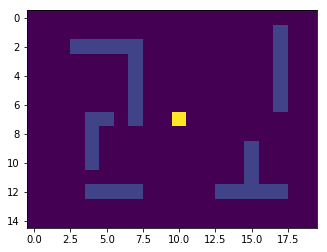

In [7]:
global_map = np.array(global_map)
height, width = global_map.shape
origin = [int(width/2.), int(height/2.)]
global_map[int(origin[1])][int(origin[0])] = 5
plt.imshow(global_map)

In [20]:
def robot_move(origin_map, origin, dx, dy):
    new_map = origin_map.copy()
    new_pos = [int(origin[0] + dx), int(origin[1] + dy)]
    new_map[new_pos[1]][new_pos[0]] = 10
    plt.imshow(new_map)
    return new_pos

def plot_local_map(origin_map, origin, border):
    local_map = origin_map.copy()
    local_map[origin[1]][origin[0]] = 10
    local_map = local_map[(origin[1]-border):(origin[1]+border),(origin[0]-border):(origin[0]+border)]
    plt.imshow(local_map)

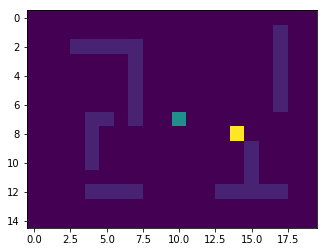

In [21]:
dx = 4
dy = 1
new_origin = robot_move(global_map, origin, dx, dy)

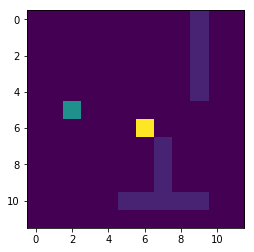

In [22]:
plot_local_map(global_map, new_origin, 6)

[10, 7] [14, 8] 4 1
[[ 1.  0. -4.]
 [ 0.  1. -1.]]
[[ 6.123234e-17 -1.000000e+00  1.700000e+01]
 [ 1.000000e+00  6.123234e-17 -3.000000e+00]]


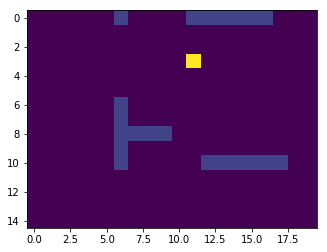

In [26]:
new_map = global_map.copy()
new_map = new_map.astype(np.uint8)
print(origin, new_origin, dx, dy)
translation_mat = np.float32([[1,0,-dx],[0,1,-dy]])
rotation_mat = cv2.getRotationMatrix2D(center=(origin[0], origin[1]), angle=-90, scale=1)
print(translation_mat)
print(rotation_mat)
new_map = cv2.warpAffine(new_map, translation_mat, (0, 0))
new_map = cv2.warpAffine(new_map, rotation_mat, (0, 0))
#dst = cv2.warpAffine(img,M,(width,height))
plt.imshow(new_map)

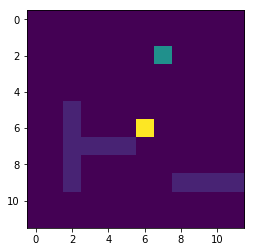

In [30]:
plot_local_map(new_map, origin, 6)